# 確率分布のサンプリング

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import norm

## 一様分布(numpyの関数使用)

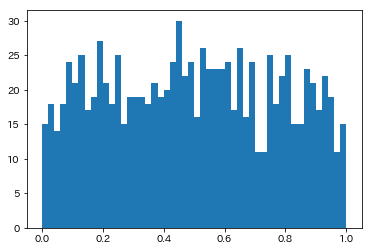

In [2]:
samples = np.random.rand(1000)
plt.hist(samples, bins=50)
plt.show()

## 正規分布(numpyの関数使用)

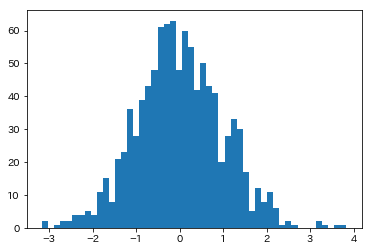

In [3]:
samples = np.random.randn(1000)
plt.hist(samples, bins=50)
plt.show()

## 正規分布(棄却サンプリング)

### サンプリングしたい確率分布として標準正規分布を定義

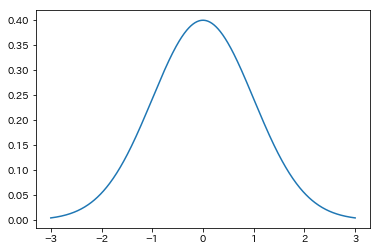

In [4]:
p = lambda x: (math.exp(-x**2/2)) / math.sqrt(2*math.pi)  # 標準正規分布をサンプリングしたい確率分布とする
x = [i / 100 for i in range(-300, 301)]
y = [p(i) for i in x]
plt.plot(x, y)
plt.show()

### 提案分布を一様分布として、棄却サンプリングを実施

受容率: 0.16649


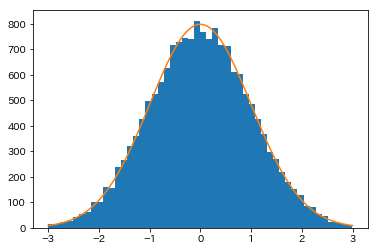

In [5]:
q_samples = np.random.rand(100000) * 6 - 3  # 提案分布は一様分布
samples = []
for z in q_samples:
    u = np.random.rand() * 1
    if u <= p(z):  # accept
        samples.append(z)

print('受容率:', len(samples)/len(q_samples))
plt.hist(samples, bins=50)
plt.plot(x, [i*2000 for i in y])
plt.show()

### 提案分布をサンプルしたい確率分布と同じにすると受容率100%

受容率: 1.0


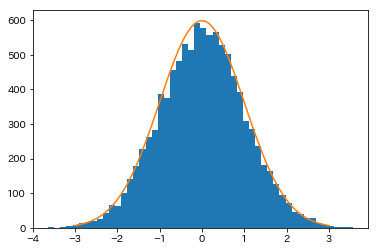

In [6]:
q_samples = np.random.normal(loc=0, scale=1, size=10000)  # 提案分布は標準正規分布
samples = []
for z in q_samples:
    u = np.random.rand() * norm.pdf(z)
    if u <= p(z):  # accept
        samples.append(z)

print('受容率:', len(samples)/len(q_samples))
plt.hist(samples, bins=50)
plt.plot(x, [i*1500 for i in y])
plt.show()

### 提案分布をサンプルしたい確率分布から少しずらす(標準正規分布の1.1倍)

受容率: 0.9046


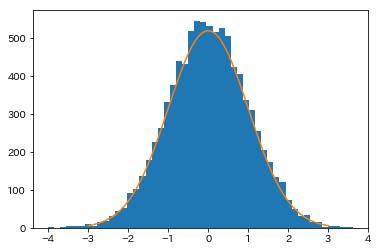

In [7]:
q_samples = np.random.normal(loc=0, scale=1, size=10000)  # 提案分布は標準正規分布
samples = []
for z in q_samples:
    u = np.random.rand() * norm.pdf(z) * 1.1
    if u <= p(z):  # accept
        samples.append(z)

print('受容率:', len(samples)/len(q_samples))
plt.hist(samples, bins=50)
plt.plot(x, [i*1300 for i in y])
plt.show()

## ポアソン分布(棄却サンプリング)

### ポアソン分布(numpyの関数使用)

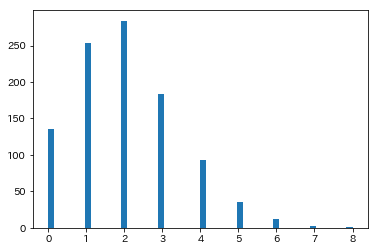

In [8]:
l = 2
samples = np.random.poisson(l, 1000)
plt.hist(samples, bins=50)
plt.show()

### サンプリングしたい確率分布としてポアソン分布を定義

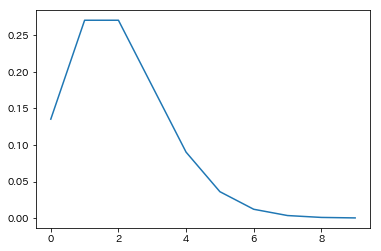

In [9]:
p = lambda x: (l**x) * math.exp(-l) / math.factorial(x)  # ポアソン分布をサンプリングしたい確率分布とする
x = [i for i in range(10)]
y = [p(i) for i in x]
plt.plot(x, y)
plt.show()

### 提案分布を一様分布として、棄却サンプリングを実施 kq(z)=1

受容率: 0.1017


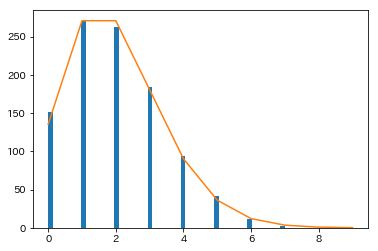

In [10]:
q_samples = np.random.randint(0, 10, size=10000)  # 提案分布は一様分布(整数)
samples = []
for z in q_samples:
    u = np.random.rand() * 1
    if u <= p(z):  # accept
        samples.append(z)

print('受容率:', len(samples)/len(q_samples))
plt.hist(samples, bins=50)
plt.plot(x, [i*1000 for i in y])
plt.show()

### 提案分布を一様分布として、棄却サンプリングを実施 kq(z)=0.3
- 受容率が上がる

受容率: 0.3237


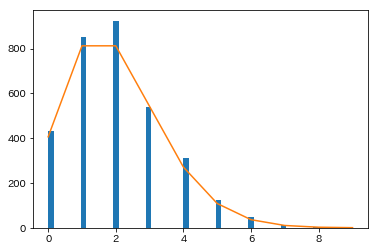

In [11]:
q_samples = np.random.randint(0, 10, size=10000)  # 提案分布は一様分布(整数)
samples = []
for z in q_samples:
    u = np.random.rand() * 0.3
    if u <= p(z):  # accept
        samples.append(z)

print('受容率:', len(samples)/len(q_samples))
plt.hist(samples, bins=50)
plt.plot(x, [i*3000 for i in y])
plt.show()

### 棄却サンプリングのまとめ
- 提案分布がサンプルしたい確率分布に近い方が受容率が高い

## マルコフ連鎖モンテカルロ法(メトロポリス・ヘイスティング法)
- 提案分布が対象なので、メトロポリス法

### 提案分布は一様分布、標準正規分布のサンプリングをする
- 提案分布が一様分布だと、ランダムサンプルの範囲が限られているせいか上手くいかない
  - 提案分布が一様分布でも何度もやっていると上手くいく場合もある
- 提案分布が正規分布だと上手くいく

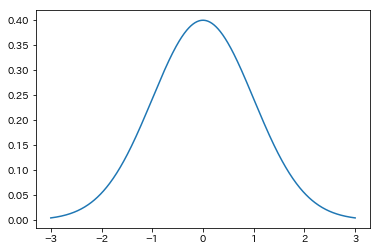

In [12]:
p = lambda x: (math.exp(-x**2/2)) / math.sqrt(2*math.pi)  # 標準正規分布をサンプリングしたい確率分布とする
x = [i / 100 for i in range(-300, 301)]
y = [p(i) for i in x]
plt.plot(x, y)
plt.show()

受容率: 0.4924


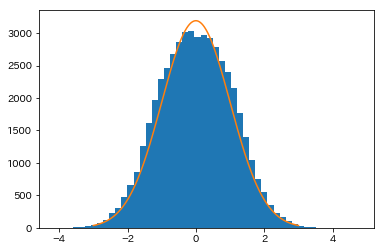

In [13]:
N = 100000
samples = []
z_old = 0.1  # 初期のサンプル
for _ in range(N):
    z_new = np.random.rand(1)[0] * 6 - 3 + z_old  # (max - min) * 乱数 + min
    p_old = p(z_old)
    p_new = p(z_new)
    r = p_new / p_old  # 提案分布が対称であるため提案分布の考慮不要
    u = np.random.rand()
    if u <= min(1, r):  # accept
        samples.append(z_new)
        z_old = z_new

print('受容率:', len(samples)/N)
plt.hist(samples, bins=50)
plt.plot(x, [i*8000 for i in y])
plt.show()

### 提案分布は標準正規分布

受容率: 0.70576


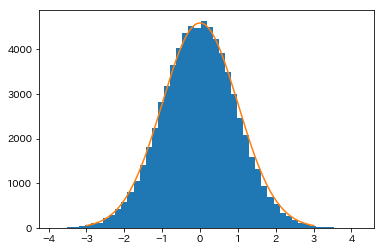

In [14]:
N = 100000
samples = []
z_old = 0  # 初期のサンプル
for _ in range(N):
    z_new = np.random.randn(1)[0] + z_old
    p_old = p(z_old)
    p_new = p(z_new)
    r = p_new / p_old  # 提案分布が対称であるため提案分布の考慮不要
    u = np.random.rand()
    if u <= min(1, r):  # accept
        samples.append(z_new)
        z_old = z_new

print('受容率:', len(samples)/N)
plt.hist(samples, bins=50)
plt.plot(x, [i*11500 for i in y])
plt.show()